In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, t

import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [3]:
# dataset obtained from https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset
df_adidas = pd.read_excel('/content/Adidas US Sales Datasets.xlsx')
df_adidas.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [4]:
# delete unnecessary rows and columns
df_adidas = df_adidas.drop([0,1,2], axis=0)
df_adidas = df_adidas.drop('Unnamed: 0', axis=1)

# rename columns
column_name = df_adidas.iloc[0]
df_adidas = df_adidas[1:]
df_adidas.columns = column_name

# returns the default index
df_adidas = df_adidas.rename_axis(None, axis=1)
df_adidas = df_adidas.reset_index(drop=True)

df_adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [5]:
df_adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


There are no null values in the dataset, but there are several data types that are not quite right. Spesifically the `'Invoice Date'` which should a datetime data type, then the `'Price per Unit'`, `'Units Sold'`, `'Total Sales'`, `'Operating Profit'` which should an integer, and the float in the `'Operating Margin'.`

In [6]:
# convert incorrect data types
integer_col = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit']
df_adidas[integer_col] = df_adidas[integer_col].astype(int)
df_adidas['Operating Margin'] = df_adidas['Operating Margin'].astype(float)
df_adidas['Invoice Date'] =  pd.to_datetime(df_adidas['Invoice Date'], format='%Y-%m-%d')
df_adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   int64         
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   int64         
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 980.0+ KB


In [7]:
# check for duplicate data
df_adidas.duplicated(keep=False).sum()

0

# Exploratory Data Analysis

In [8]:
df_adidas.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.182214,256.930037,93273.403089,34424.911692,0.422991
std,14.698080,214.252030,141915.997157,54193.216234,0.097197
min,7.000000,0.000000,0.000000,0.000000,0.100000
25%,35.000000,106.000000,4254.500000,1921.000000,0.350000
50%,45.000000,176.000000,9576.000000,4371.000000,0.410000
75%,55.000000,350.000000,150000.000000,52062.000000,0.490000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000


At first glance, you can see a very significant difference in `'Total Sales'`, between quartile 2 and quartile 3. Also in quartile 3 and the maximum value in `'Unit Sold'`, of course this will also affect `'Operating Profit'` and `'Operating Margin'`, because these two values are obtained through calculations involving `'Unit Sold'`

<Axes: >

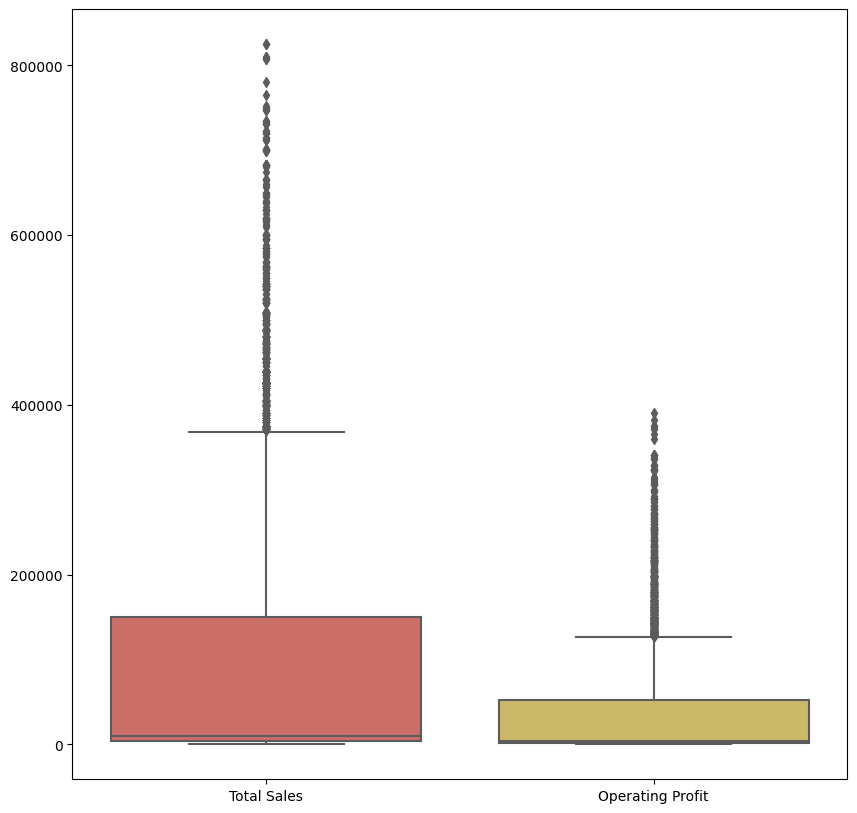

In [9]:
# Identify outliers on Total Sales and Operating Profit
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df_adidas[['Total Sales', 'Operating Profit']], palette=('#db5f57', '#dbc257'))

<Axes: >

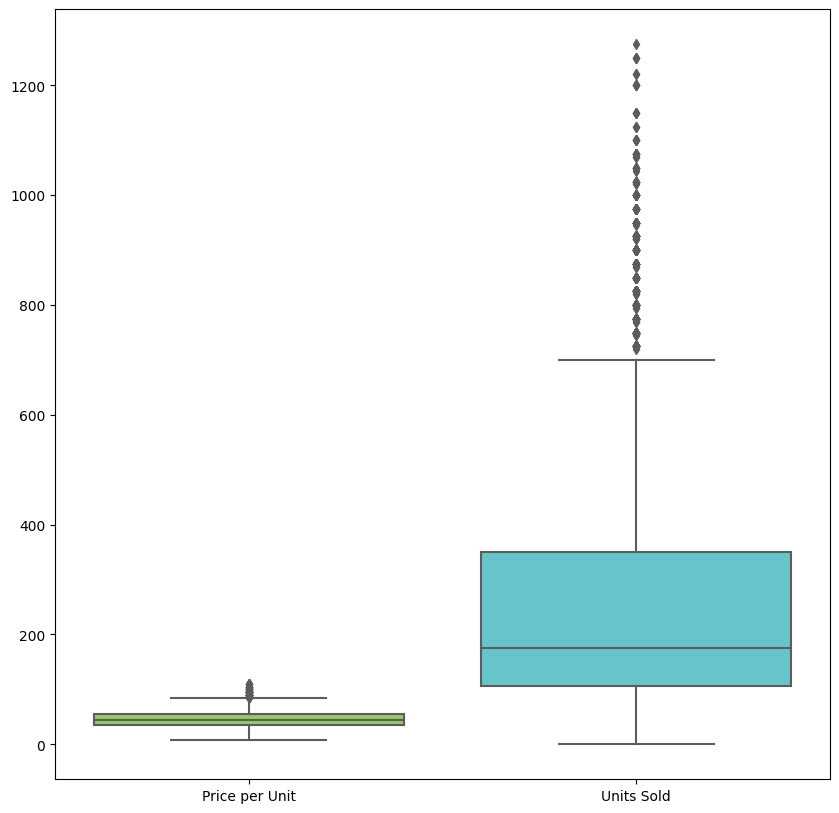

In [10]:
# Identify outliers on Price per Unit and Units Sold
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df_adidas[['Price per Unit', 'Units Sold']], palette=('#91db57', '#57d3db'))

it is known that there are outliers in several columns, but we assume the data is valid and correct, so I don't delete these outliers. Because outliers can also be a valuable source of information for understanding the factors that affect sales and profits.

# Analysis

## Statistical Descriptive Analysis

### What products sell the most and provide the most profit?

In [11]:
# get product data that generates the best sales and profits
best_products = df_adidas.groupby(df_adidas['Product']).agg({'Units Sold': 'sum', 'Operating Profit': 'sum'})
best_products = best_products.sort_values(by=['Units Sold', 'Operating Profit'], ascending=False)
best_products

,Units Sold,Operating Profit
Product,,
Men's Street Footwear,593320,82801715
Men's Athletic Footwear,435526,51846374
Women's Apparel,433827,68650450
Women's Street Footwear,392269,45095297
Women's Athletic Footwear,317236,38975265
Men's Apparel,306683,44762447


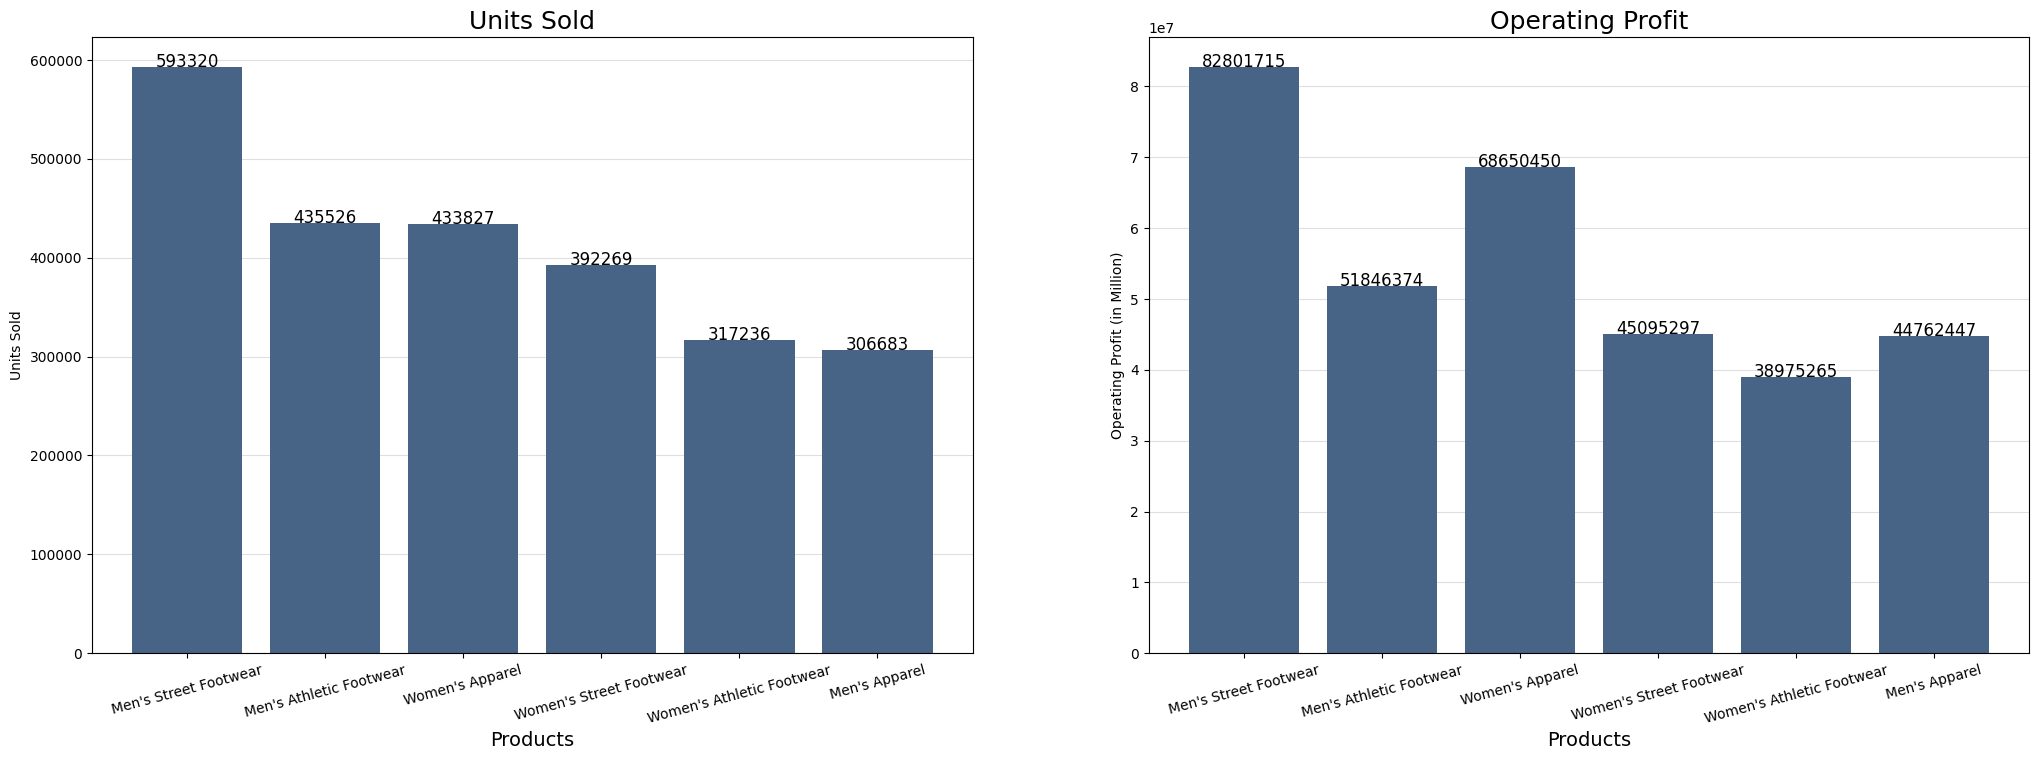

In [12]:
# visualize each of the products that generate the best sales and profits
xPoints = np.array(best_products.index)
y1Points = np.array(best_products['Units Sold'])
y2Points = np.array(best_products['Operating Profit'])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 8))

axes[0].bar(xPoints, y1Points, color='#476385', zorder=2)
axes[0].set_title('Units Sold', fontsize=18)
axes[0].set_xlabel('Products', fontsize=14)
axes[0].set_ylabel('Units Sold')
axes[0].set_xticklabels(xPoints, rotation=15)
axes[0].grid(axis='y', alpha=0.4)
for i, v in enumerate(y1Points):
    axes[0].text(i, v, str(v), color='black', ha='center', fontsize=12)

axes[1].bar(xPoints, y2Points, color='#476385', zorder=2)
axes[1].set_title('Operating Profit', fontsize=18)
axes[1].set_xlabel('Products', fontsize=14)
axes[1].set_ylabel('Operating Profit (in Million)')
axes[1].set_xticklabels(xPoints, rotation=15)
axes[1].grid(axis='y', alpha=0.4)
for i, v in enumerate(y2Points):
    axes[1].text(i, v, str(v), color='black', ha='center', fontsize=12)

plt.show()

### What are the variations in data from the variables Units sold, Total sales, and Operating profit?

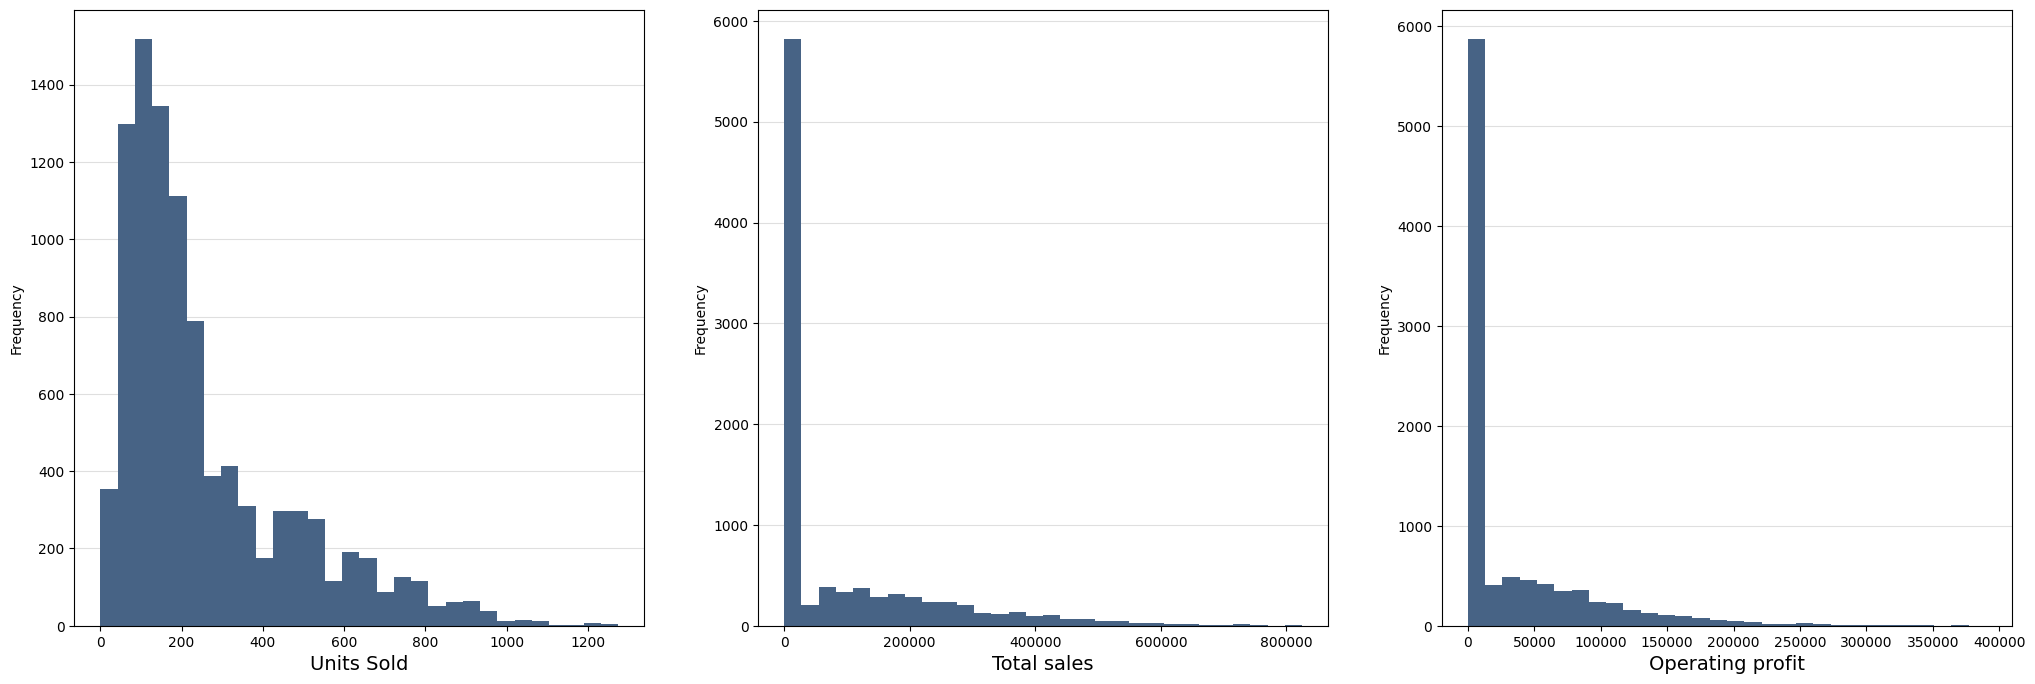

In [13]:
# visualize the histogram to get the data distribution
fig, axs = plt.subplots(1, 3, figsize=(25,8))

axs[0].hist(df_adidas['Units Sold'], bins=30, color='#476385', zorder=2)
axs[0].set_xlabel('Units Sold', fontsize=14)
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', alpha=0.4)

axs[1].hist(df_adidas['Total Sales'], bins=30, color='#476385', zorder=2)
axs[1].set_xlabel('Total sales', fontsize=14)
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y', alpha=0.4)

axs[2].hist(df_adidas['Operating Profit'], bins=30, color='#476385', zorder=2)
axs[2].set_xlabel('Operating profit', fontsize=14)
axs[2].set_ylabel('Frequency')
axs[2].grid(axis='y', alpha=0.4)

plt.show()

## Discrete Variable Analysis

### Sales method distribution in each region

In [14]:
# grouping sales method data by region
sales_by_region = df_adidas.groupby('Region')['Sales Method'].value_counts(normalize=True)
sales_by_region

Region     Sales Method
Midwest    Online          0.622329
           In-store        0.237714
           Outlet          0.139957
Northeast  Online          0.393939
           Outlet          0.318603
           In-store        0.287458
South      Outlet          0.500000
           Online          0.488426
           In-store        0.011574
Southeast  Online          0.647059
           Outlet          0.194444
           In-store        0.158497
West       Online          0.470588
           Outlet          0.366830
           In-store        0.162582
Name: Sales Method, dtype: float64

### What is the percentage of online vs In-store vs Outlet sales for each retailer?

In [15]:
# shows the unique value of the sales method
df_adidas['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

- Outlet store is a shop that sells certain brand items with big discounts because these items are usually leftover stock from the previous season or products that are not selling well in regular stores.

- In-store is a regular retail store located in a shopping center or in a strategic location in the city center. These stores sell the latest products and usually do not offer the deep discounts seen at outlet stores.

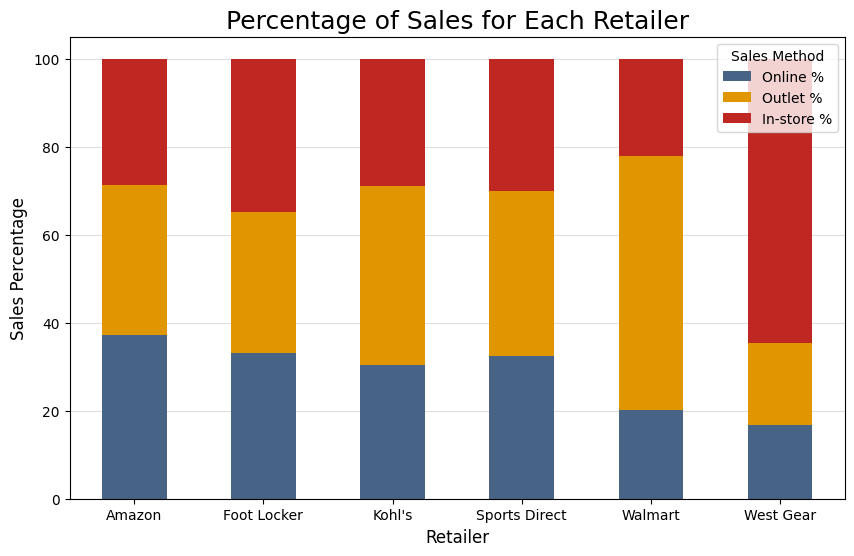

In [16]:
# calculates total online, in-store, and outlet sales for each retailer
total_sales_by_retailer = df_adidas.groupby(['Retailer', 'Sales Method'])['Total Sales'].sum()
total_sales_by_retailer = total_sales_by_retailer.unstack()
total_sales_by_retailer['Total'] = total_sales_by_retailer.sum(axis=1)

# create new columns containing the percentage of each
total_sales_by_retailer['Online %'] = (total_sales_by_retailer['Online'] / total_sales_by_retailer['Total']) * 100
total_sales_by_retailer['In-store %'] = (total_sales_by_retailer['In-store'] / total_sales_by_retailer['Total']) * 100
total_sales_by_retailer['Outlet %'] = (total_sales_by_retailer['Outlet'] / total_sales_by_retailer['Total']) * 100

# create a stacked bar chart to visualize the data
total_sales_by_retailer[['Online %', 'Outlet %', 'In-store %']].plot(kind='bar', stacked=True, figsize=(10, 6), color=('#476385', '#e09600', '#BF2722'), zorder=2)
plt.title('Percentage of Sales for Each Retailer', fontsize=18)
plt.xlabel('Retailer', fontsize=12)
plt.ylabel('Sales Percentage', fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.xticks(rotation=0)
plt.show()

In [17]:
total_sales_by_retailer

Sales Method,In-store,Online,Outlet,Total,Online %,In-store %,Outlet %
Retailer,,,,,,,
Amazon,22366246,28909720,26422918,77698884,37.207381,28.785801,34.006818
Foot Locker,76524940,72943270,70626396,220094606,33.141780,34.769112,32.089108
Kohl's,29566234,30992221,41556269,102114724,30.350394,28.953938,40.695668
Sports Direct,55048455,59225980,68196482,182470917,32.457764,30.168345,37.373891
Walmart,16411249,15069488,43077664,74558401,20.211657,22.011267,57.777076
West Gear,156726441,40532132,45705688,242964261,16.682343,64.505965,18.811692


## Continuous Variable Analysis



### Which is more likely:
- Selling products with a price per unit above the average has a greater profit than selling products with a price per unit below the average, or
- Selling products with a price per unit below the average has a greater profit than selling products with a price per unit above the average?

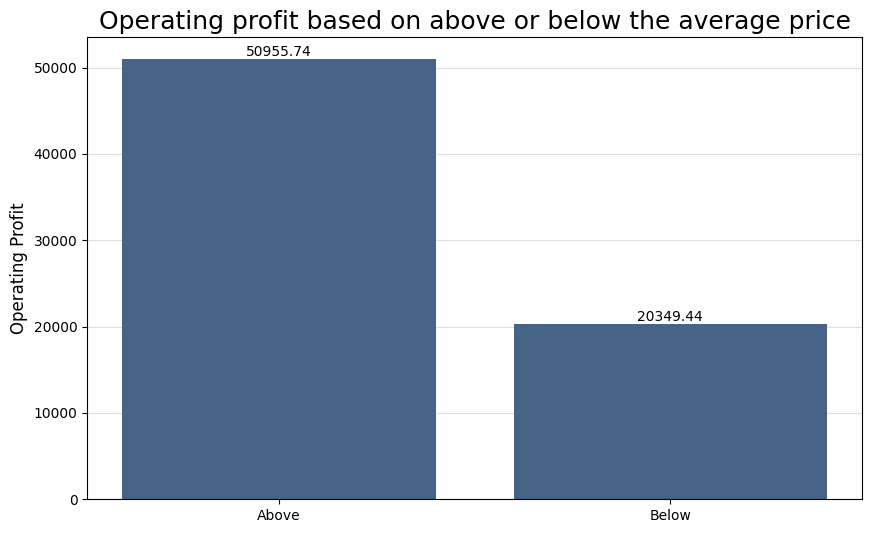

In [18]:
# get the average value of the column price per unit
mean_price = df_adidas["Price per Unit"].mean()

# create a new column as the above or below price category
df_adidas["Price Category"] = df_adidas["Price per Unit"].apply(lambda x: "Above" if x > mean_price else "Below")

# calculate the average profit for each price category
mean_profit = df_adidas.groupby("Price Category")["Operating Profit"].mean()

# visualize the data
plt.figure(figsize=(10, 6))
plt.bar(mean_profit.index, mean_profit.values, color='#476385', zorder=2)
plt.title("Operating profit based on above or below the average price", fontsize=18)
plt.ylabel("Operating Profit", fontsize=12)
plt.grid(axis='y', alpha=0.4)
for i, v in enumerate(mean_profit.values):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.show()

### What is the probability that a product is sold at a price per unit above the average price per unit of all products?

In [19]:
# get the average price per unit of all products
mean_price = df_adidas['Price per Unit'].mean()

# count the number of products sold at a price per unit above the average
above_mean = df_adidas[df_adidas['Price per Unit'] > mean_price]['Product'].count()

# count the total number of products sold
total = df_adidas['Product'].count()

# calculate the probability that the product is sold at a price per unit above the average
probability = above_mean / total
probability

0.45988805970149255

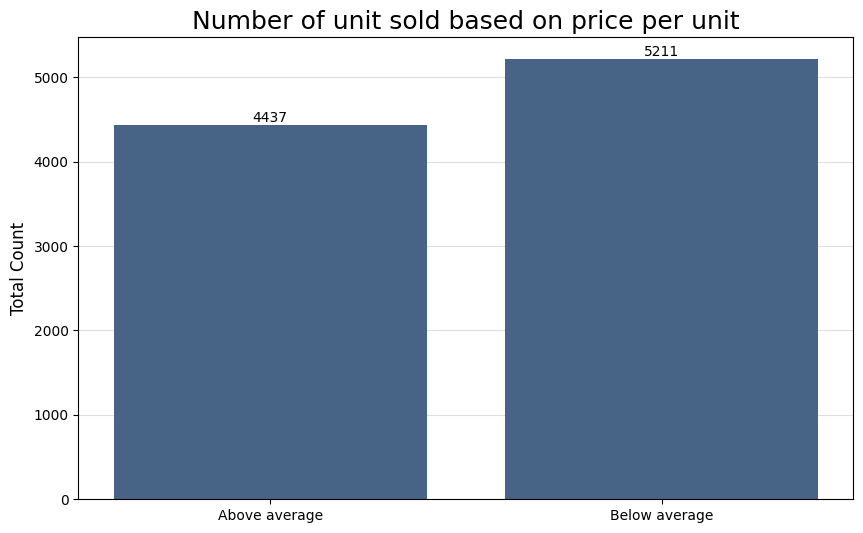

In [20]:
# visualize to compare
plt.figure(figsize=(10, 6))
plt.bar(['Above average', 'Below average'], [above_mean, total - above_mean], color='#476385', zorder=2)
plt.title('Number of unit sold based on price per unit', fontsize=18)
plt.ylabel('Total Count', fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.text(0, above_mean, above_mean, ha='center', va='bottom')
plt.text(1, total - above_mean, total - above_mean, ha='center', va='bottom')

plt.show()

## Variable Correlation Analysis

### Is there a relationship between price per unit and total sales?

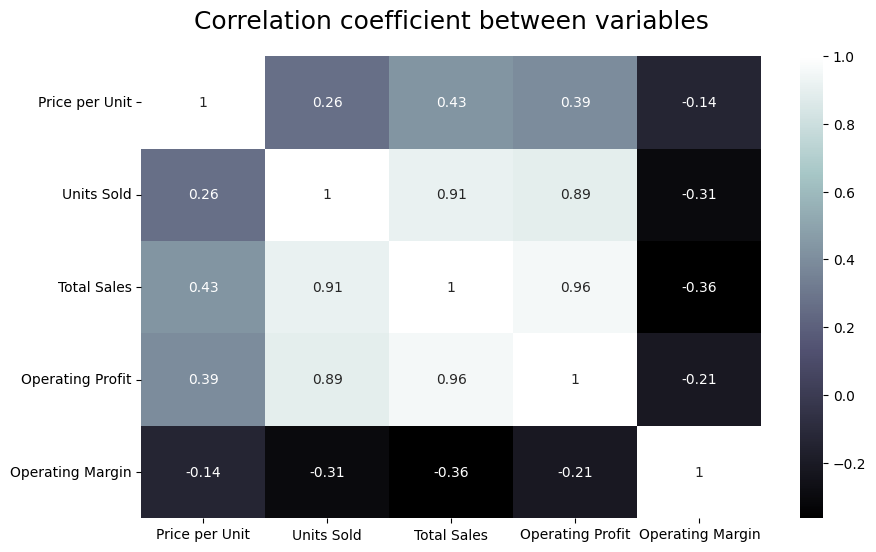

In [21]:
# create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_adidas.corr(), annot=True, cmap='bone')
plt.title("Correlation coefficient between variables", fontsize=18, pad=20)
plt.show()

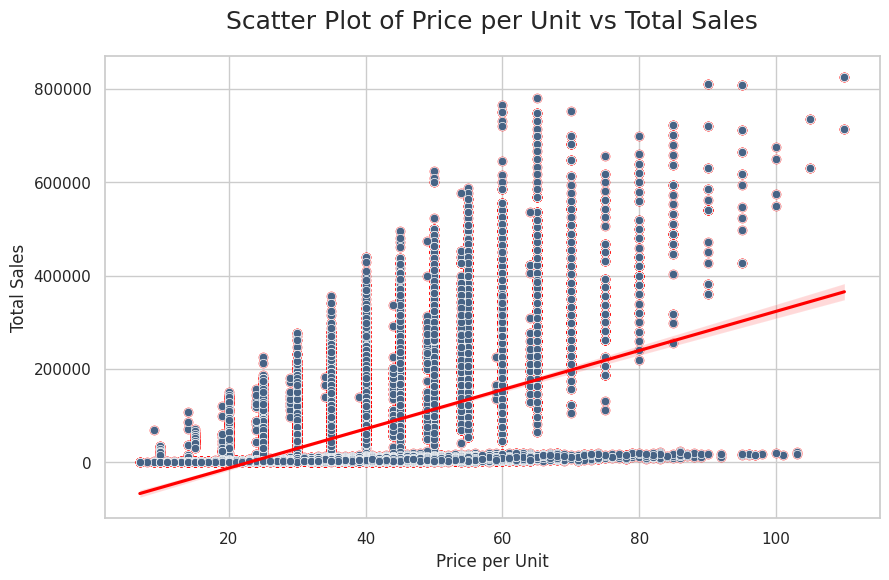

In [22]:
# create a scatter plot with a regression line to show the relationship between unit price and total sales
plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")
sns.regplot(x="Price per Unit", y="Total Sales", data=df_adidas, color='red')
sns.scatterplot(x="Price per Unit", y="Total Sales", data=df_adidas, color='#476385')
plt.title("Scatter Plot of Price per Unit vs Total Sales", fontsize=18, pad=20)
plt.xlabel("Price per Unit")
plt.ylabel("Total Sales")
plt.show()

## Hypothesis Testing

The average profit of the company more than 40000

In [23]:
# defines the alpha value
alpha = 0.05

# calculate the t-critical
t_crit = t.ppf(alpha, df=999)
t_crit

-1.6463803454275356

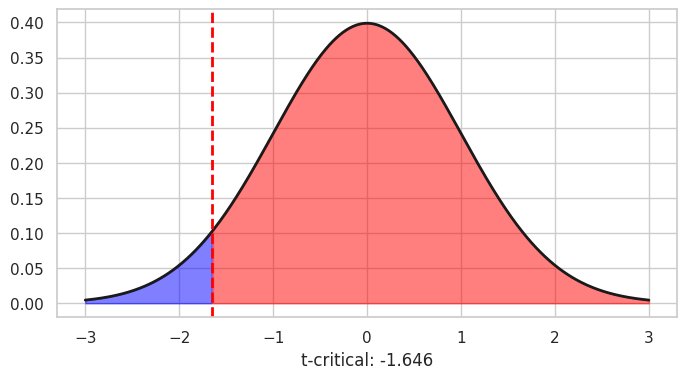

In [25]:
# create critical value visualization in t-distribution
x = np.linspace(-3, 3, num=500)
y = t.pdf(x, df=999)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, 'k', linewidth=2)
ax.fill_between(x[x<=t_crit], y[x<=t_crit], color='blue', alpha=0.5)
ax.fill_between(x[x>=t_crit], y[x>=t_crit], color='red', alpha=0.5)
ax.axvline(x=t_crit, color='red', linestyle='--', lw=2)
ax.set_xlabel('t-critical: -1.646', fontsize=12)

plt.show()

In [26]:
sample = df_adidas['Operating Profit'].sample(1000)

In [29]:
# calculating test statistics and p-values using the scipy library
stat, pvalue = ttest_1samp(a=sample, popmean=40000, alternative='less')
print(f'test statistics: {stat:.3f}') 
print(f'p-value: {pvalue:.3f}')

test statistics: -2.546
p-value: 0.006
